In [10]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline
import plotly
from scipy.spatial import distance
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)
import math
from google.colab import files
files.upload()

{}

In [11]:
df_HealthAnalytics = pd.read_csv("HealthAnalytics.csv")
print (df_HealthAnalytics)

          id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  

In [3]:
df_HealthAnalytics.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [8]:
df_HealthAnalytics.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df_HealthAnalytics.isnull()
df_HealthAnalytics.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [18]:
df_HA = df_HealthAnalytics.dropna()

Como el fumar es un habito que realmente impacta, se prefiere eliminar aquellos de los que no se tienen datos, porque podrian desviar el estudio

In [19]:
df_HA.isnull()
df_HA.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
fumador_unique = list(df_HA.smoking_status.unique())
smoking_status = {} 
i = 0
for name in fumador_unique:
    smoking_status[name] = i
    i = i + 1

new_HA = []
for row in df_HA.smoking_status:
    new_HA.append(smoking_status[row])

df_HA["fumstat"] = new_HA
data = df_HA.drop("smoking_status", axis=1)

print(smoking_status)

{'never smoked': 0, 'formerly smoked': 1, 'smokes': 2}


In [29]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,fumstat
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0,1
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,0,1
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,0,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,0,2


ahora tengo un codigo asociado a fumador. 

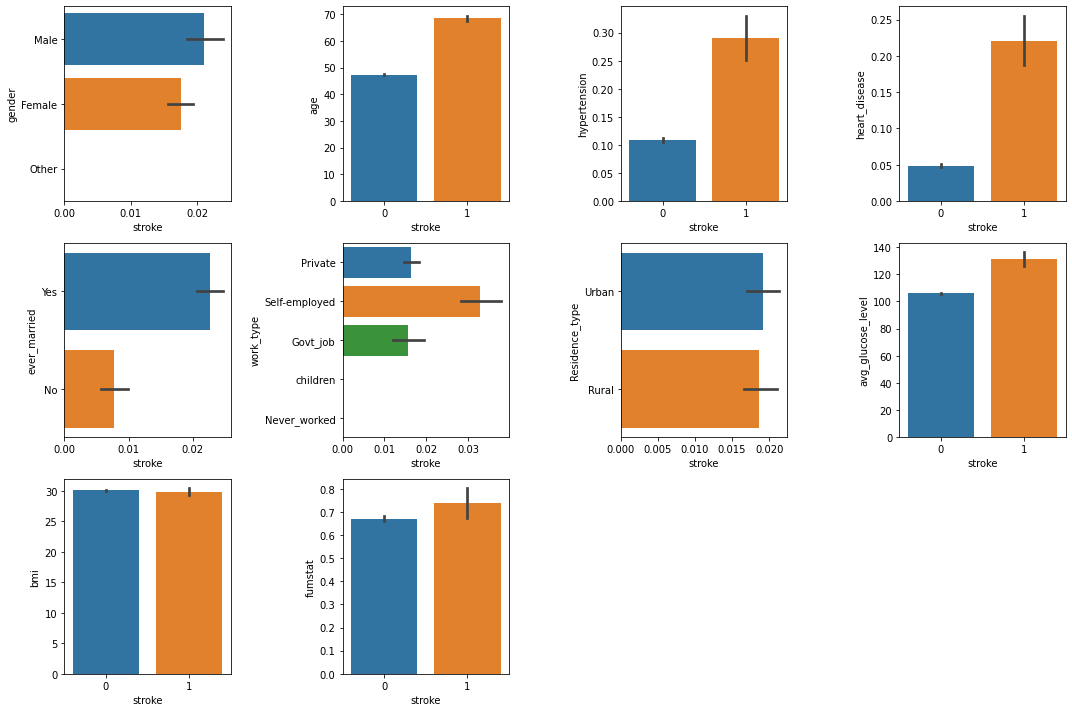

In [30]:
#Plotting out the data
import pylab

fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='stroke',y='gender',data=data)
plt.subplot(3,4,2)
sns.barplot(x='stroke',y='age',data=data)
plt.subplot(3,4,3)
sns.barplot(x='stroke',y='hypertension',data=data)
plt.subplot(3,4,4)
sns.barplot(x='stroke',y='heart_disease',data=data)
plt.subplot(3,4,5)
sns.barplot(x='stroke',y='ever_married',data=data)
plt.subplot(3,4,6)
sns.barplot(x='stroke',y='work_type',data=data)
plt.subplot(3,4,7)
sns.barplot(x='stroke',y='Residence_type',data=data)
plt.subplot(3,4,8)
sns.barplot(x='stroke',y='avg_glucose_level',data=data)
plt.subplot(3,4,9)
sns.barplot(x='stroke',y='bmi',data=data)
plt.subplot(3,4,10)
sns.barplot(x='stroke',y='fumstat',data=data)
plt.tight_layout()

de esto se analiza que la gente con hipertension, con condiciones de corazon, bmi o fumadores, tienen mayores posibilidades de tener un infarto (ademas, los casados y los trabajadores cuentapropistas tambien)

In [31]:
corr_df = data.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,fumstat
id,1.000000,0.003718,0.002866,0.012479,0.023062,0.008931,-0.000484,0.017828
age,0.003718,1.000000,0.257564,0.247434,0.228294,0.106416,0.154060,0.060230
hypertension,0.002866,0.257564,1.000000,0.117980,0.154063,0.129291,0.078684,0.008742
heart_disease,0.012479,0.247434,0.117980,1.000000,0.137489,0.022754,0.105149,0.062724
avg_glucose_level,0.023062,0.228294,0.154063,0.137489,1.000000,0.176897,0.075452,0.025975
bmi,0.008931,0.106416,0.129291,0.022754,0.176897,1.000000,-0.004029,0.021074
stroke,-0.000484,0.154060,0.078684,0.105149,0.075452,-0.004029,1.000000,0.011140
fumstat,0.017828,0.060230,0.008742,0.062724,0.025975,0.021074,0.011140,1.000000


edad, hearts diseases e hipertension son los valores que mas afectan a la posibilidad de un stroke.

In [32]:
data.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.154060
heart_disease        0.105149
hypertension         0.078684
avg_glucose_level    0.075452
fumstat              0.011140
id                  -0.000484
bmi                 -0.004029
Name: stroke, dtype: float64

In [33]:
data['stroke'].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

In [34]:
stroke = data[data['stroke']==1]
No_stroke = data[data['stroke']==0]

No_stroke = No_stroke.sample(frac=1)
No_stroke = No_stroke[:len(stroke)]

new_df = pd.concat([stroke,No_stroke])
new_df = new_df.sample(frac=1)
new_df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,fumstat
8535,65406,Female,35.0,0,0,No,Private,Rural,124.39,24.6,0,0
30738,27833,Male,77.0,1,0,Yes,Private,Urban,253.29,48.6,1,1


balanceando las dos clases

In [35]:
new_df['stroke'].value_counts()

0    548
1    548
Name: stroke, dtype: int64

Hasta aqui el analisis analizamos todo lo que afecta a la posibilidad de un stroke. ahora analizaremos que modelo de machine learning es mejor.

In [37]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 544 kB 8.6 MB/s 
     |████████████████████████████████| 2.0 MB 47.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.7 MB 22.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 69 kB 6.8 MB/s 
     |████████████████████████████████| 3.3 MB 42.4 MB/s 
     |████████████████████████████████| 281 kB 49.8 MB/s 
     |████████████████████████████████| 134 kB 19.2 MB/s 
     |████████████████████████████████| 11.2 MB 35.2 MB/s 
     |████████████████████████████████| 106 kB 61.5 MB/s 
     |████████████████████████████████| 79.9 MB 115 kB/s 
     |████████████████████████████████| 1.8 MB 44.9 MB/s 
     |█████████████████████

In [38]:
from pycaret.classification import *
from collections.abc import Iterable
import lightgbm as lgb

clf = setup(new_df, target = "stroke", session_id = 786)
best = compare_models()

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 1db2
INFO:logs:self.variable_keys: {'memory', 'data', 'y', '_all_models_internal', 'html_param', 'n_jobs_param', 'seed', 'gpu_param', 'exp_name_log', 'exp_id', 'logging_param', 'fix_imbalance', 'pipeline', 'fold_groups_param', 'y_test', 'master_model_container', '_gpu_n_jobs_param', 'variable_keys', 'X_train', '_all_mode

,Description,Value
0,Session id,786
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(1096, 12)"
4,Transformed data shape,"(1096, 18)"
5,Transformed train set shape,"(767, 18)"
6,Transformed test set shape,"(329, 18)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,4


INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 5.6s...............
INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f3d30700a50>, include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classific

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7525,0.0000,0.8070,0.7291,0.7650,0.5046,0.5096,0.0750
lda,Linear Discriminant Analysis,0.7512,0.8181,0.8045,0.7284,0.7635,0.5020,0.5067,0.0960
nb,Naive Bayes,0.7511,0.8069,0.8356,0.7187,0.7710,0.5019,0.5121,0.0960
gbc,Gradient Boosting Classifier,0.7290,0.7835,0.7576,0.7184,0.7367,0.4577,0.4593,0.2080
rf,Random Forest Classifier,0.7225,0.7997,0.7601,0.7075,0.7320,0.4446,0.4473,0.3660
et,Extra Trees Classifier,0.7054,0.7704,0.7366,0.6952,0.7142,0.4106,0.4128,0.3260
lr,Logistic Regression,0.7016,0.7864,0.7548,0.6830,0.7165,0.4027,0.4061,1.8640
ada,Ada Boost Classifier,0.7003,0.7675,0.7497,0.6832,0.7136,0.4002,0.4039,0.1800
lightgbm,Light Gradient Boosting Machine,0.6950,0.7717,0.7262,0.6860,0.7032,0.3894,0.3931,0.2300
dt,Decision Tree Classifier,0.6740,0.6737,0.6715,0.6773,0.6731,0.3476,0.3490,0.0940


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 7.620652516682943e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f3d30700a50>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7f3d22b0e690>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=786, solver='auto', tol=0.001)
INFO:logs:compare_models() successfully completed......................................


In [42]:
#Splitting the data in train and test.
from sklearn.model_selection import train_test_split

X = new_df.drop('stroke',axis=1) 
Y = new_df['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)